In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
random.seed(25)

C:\Users\okial\AppData\Local\Temp\ipykernel_2676\797276312.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_excel("../Dataset/sleep_dataset_enhanced.xlsx")
df.head()

,Species,Genus,Order,Family,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
0,African elephant,Loxodonta,Proboscidea,Elephantidae,herbi,vu,6654.000,5712.0,3.3,20.7,NaN,NaN,38.6,645.0,3.0,5.0,3.0
1,African giant pouched rat,Cricetomys,Rodentia,Nesomyidae,omni,lc,1.000,6.6,8.3,15.7,6.3,2.0,4.5,42.0,3.0,1.0,3.0
2,African striped mouse,Rhabdomys,Rodentia,Muridae,omni,lc,0.044,0.0,8.7,15.3,NaN,NaN,2.0,23.0,NaN,NaN,NaN
3,Arctic fox,Vulpes,Carnivora,Canidae,carni,lc,3.380,44.5,12.5,11.5,NaN,NaN,14.0,60.0,1.0,1.0,1.0
4,Arctic ground squirrel,Spermophilus,Rodentia,Sciuridae,herbi,lc,0.920,5.7,16.6,7.4,NaN,NaN,11.0,25.0,5.0,2.0,3.0


In [3]:
df.shape

(87, 17)

In [4]:
df.describe()

# Min BrainWt 0 ?

,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
count,87.000000,87.000000,87.000000,87.000000,47.000000,63.000000,87.000000,87.000000,58.000000,58.000000,58.000000
mean,161.384310,196.405287,10.608046,13.393103,8.736170,1.979365,17.275862,129.362069,2.844828,2.362069,2.586207
std,768.846727,793.628150,4.465793,4.467481,3.679522,1.474204,17.787590,137.010772,1.496214,1.575005,1.426989
min,0.005000,0.000000,1.900000,4.100000,2.100000,0.100000,2.000000,11.000000,1.000000,1.000000,1.000000
25%,0.202500,0.000000,8.150000,10.250000,6.300000,0.900000,3.700000,30.000000,2.000000,1.000000,1.000000
50%,2.000000,5.500000,10.300000,13.700000,8.400000,1.800000,12.000000,68.000000,3.000000,2.000000,2.000000
75%,43.165000,64.000000,13.750000,15.850000,11.000000,2.500000,24.500000,180.000000,4.000000,4.000000,4.000000
max,6654.000000,5712.000000,19.900000,22.100000,17.900000,6.600000,100.000000,645.000000,5.000000,5.000000,5.000000


In [5]:
df.isna().sum()
# Many columns with missing values

Species          0
Genus            0
Order            0
Family           0
Vore             0
Conservation     0
BodyWt           0
BrainWt          0
TotalSleep       0
Awake            0
NonDreaming     40
Dreaming        24
LifeSpan         0
Gestation        0
Predation       29
Exposure        29
Danger          29
dtype: int64

In [6]:
df.Vore.value_counts()
# The model will have a hard time predicting values for insectivores

Vore
herbi      37
carni      22
omni       20
insecti     8
Name: count, dtype: int64

In [7]:
df.Conservation.value_counts()
# vu: Vulnerable
# lc: Least Concern
# en: Endangered
# domesticated: Domesticated (typically referring to species that have been bred and kept by humans)
# cd: Critically Endangered
# nt: Near Threatened
# cr: Critically Endangered

Conservation
lc              50
domesticated    10
vu               9
en               8
nt               7
cd               2
cr               1
Name: count, dtype: int64

<Axes: ylabel='BodyWt'>

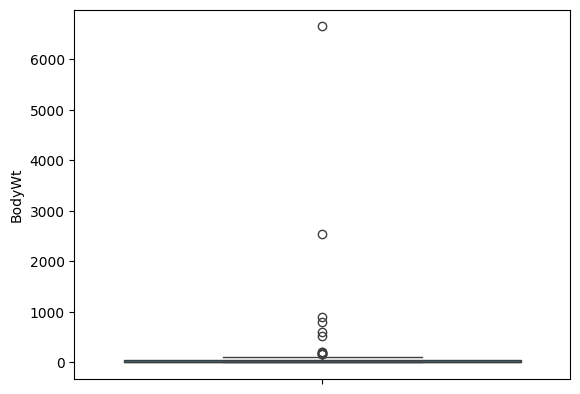

In [8]:
sns.boxplot(df.BodyWt)

# Highly asymmetrical distribution - Use of a logarithm transformation ?

<Axes: ylabel='BodyWt'>

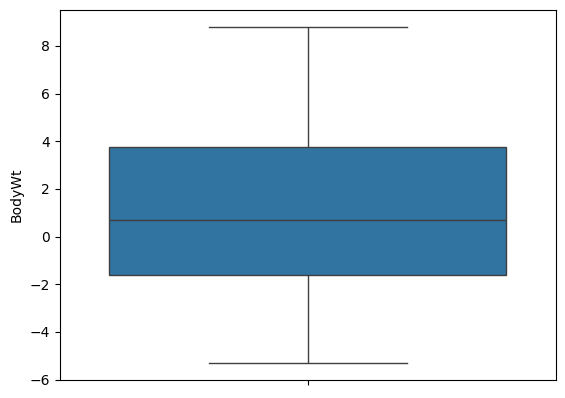

In [9]:
sns.boxplot(np.log(df.BodyWt))
# more usable with a logarithm scale

<Axes: ylabel='BrainWt'>

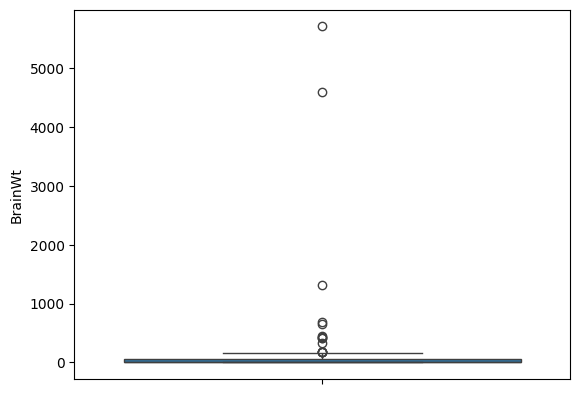

In [10]:
sns.boxplot(df.BrainWt)
# Also highly asymmetrical
# Impossible to use the logarithm tranformation due to null values

In [11]:
len(df.loc[df.BrainWt == 0])
# 23 rows with null values
# They are missing values to be replaced

23

<Axes: xlabel='Awake', ylabel='Count'>

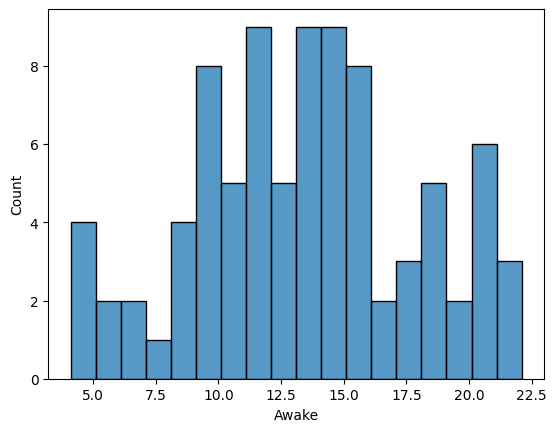

In [12]:
sns.histplot(df,x="Awake",binwidth=1)

<Axes: xlabel='LifeSpan', ylabel='Count'>

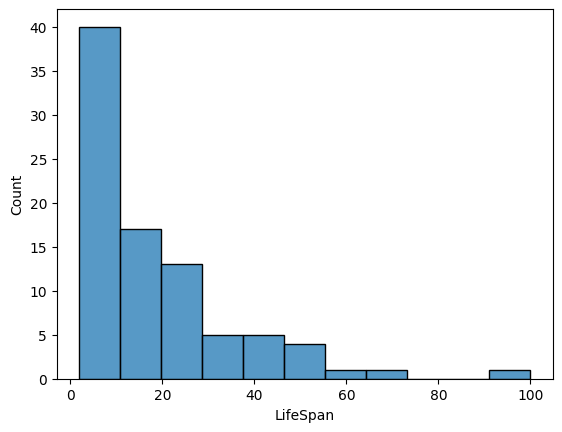

In [13]:
sns.histplot(df,x="LifeSpan")

In [14]:
df.loc[df.LifeSpan > 60]

,Species,Genus,Order,Family,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
5,Asian elephant,Elephas,Proboscidea,Elephantidae,herbi,en,2547.0,4603.0,3.9,20.1,2.1,1.8,69.0,624.0,3.0,5.0,4.0
41,Human,Homo,Primates,Hominidae,omni,lc,62.0,1320.0,8.0,16.0,6.1,1.9,100.0,267.0,1.0,1.0,1.0


<Axes: xlabel='Gestation', ylabel='Count'>

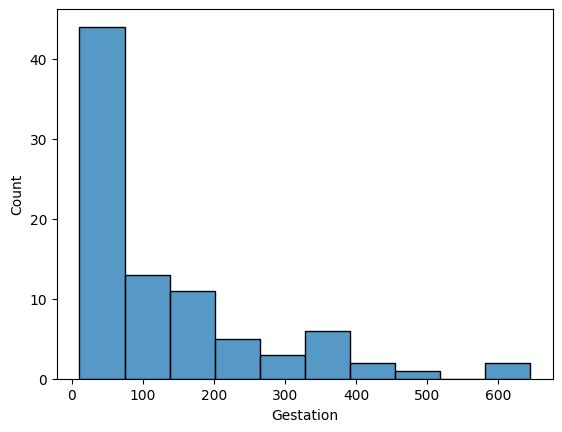

In [15]:
sns.histplot(df,x="Gestation")

# Gestation and LifeSpan with asymmetrical distributions

In [16]:
df.loc[df.Danger.isna(),['Predation','Exposure','Danger']]
# Values missing for the same rows in the dataset

,Predation,Exposure,Danger
2,NaN,NaN,NaN
8,NaN,NaN,NaN
10,NaN,NaN,NaN
11,NaN,NaN,NaN
14,NaN,NaN,NaN
15,NaN,NaN,NaN
17,NaN,NaN,NaN
18,NaN,NaN,NaN
20,NaN,NaN,NaN
23,NaN,NaN,NaN


<Axes: xlabel='Danger', ylabel='Count'>

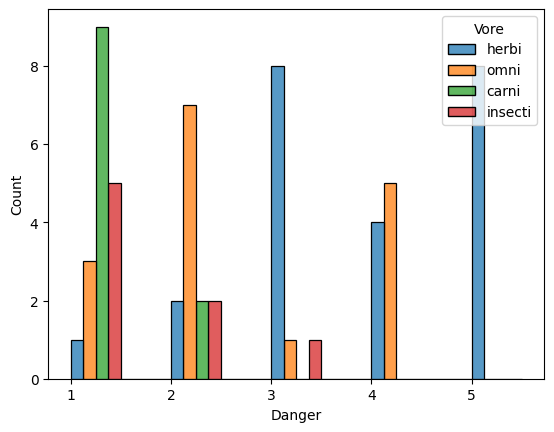

In [17]:
sns.histplot(data=df, x="Danger", hue="Vore", multiple="dodge",binrange=(1,5.5),binwidth=0.5)

<Axes: xlabel='Exposure', ylabel='Count'>

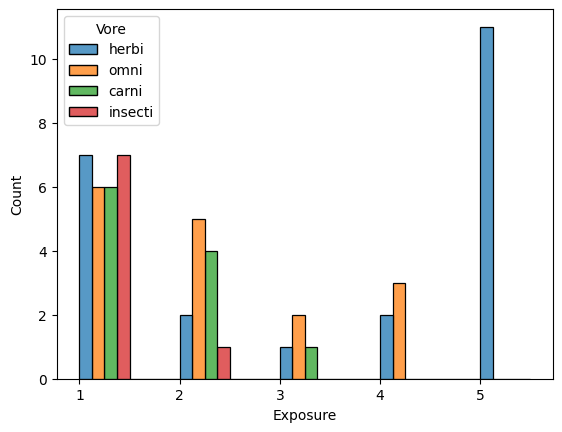

In [18]:
sns.histplot(data=df, x="Exposure", hue="Vore", multiple="dodge",binrange=(1,5.5),binwidth=0.5)

<Axes: xlabel='Predation', ylabel='Count'>

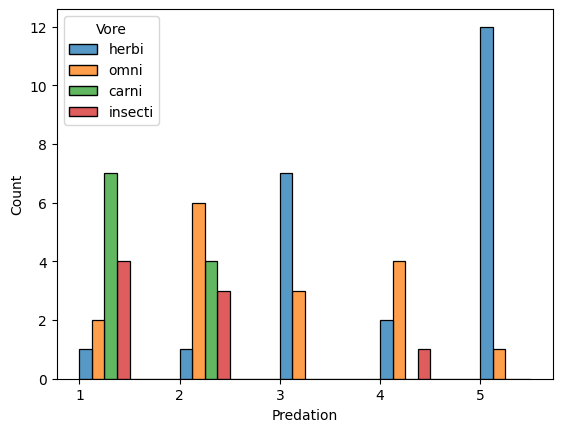

In [19]:
sns.histplot(data=df, x="Predation", hue="Vore", multiple="dodge",binrange=(1,5.5),binwidth=0.5)

<Axes: >

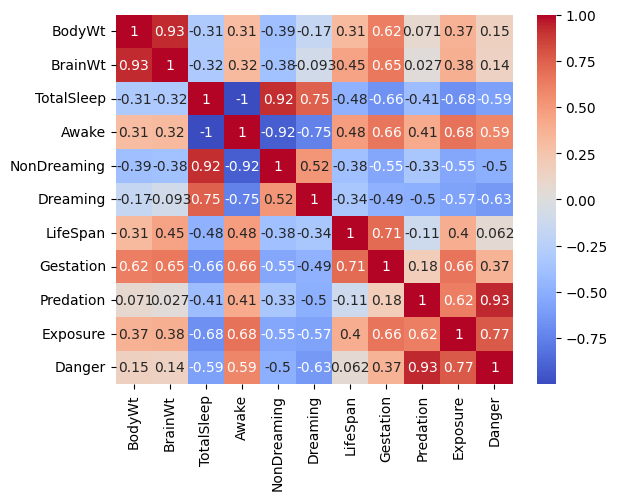

In [20]:
sns.heatmap(df[["BodyWt","BrainWt","TotalSleep",'Awake', 'NonDreaming', 'Dreaming', 'LifeSpan',
       'Gestation', 'Predation', 'Exposure', 'Danger']].corr(),annot=True,cmap='coolwarm')
# Unexpected correlations between
# BrainWt and Gestation
# Awake and Exposure
# Dreaming and Danger
# Gestation and Exposure....

<Axes: xlabel='TotalSleep', ylabel='Dreaming'>

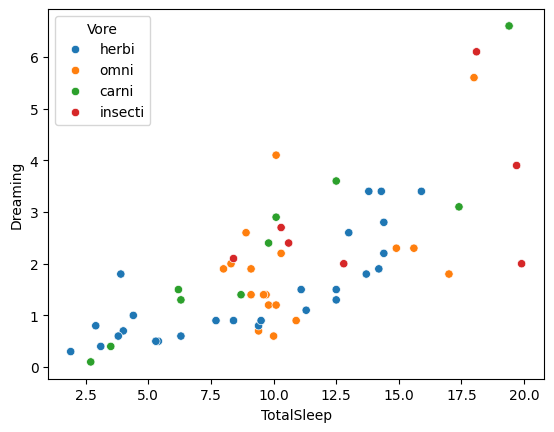

In [21]:
sns.scatterplot(df,x="TotalSleep",y="Dreaming",hue="Vore")

In [22]:
df[['Exposure','Vore','TotalSleep']].groupby(['Vore','Exposure']).mean()

TotalSleep
Vore    Exposure            
carni   1.0        13.750000
        2.0        10.575000
        3.0         6.200000
herbi   1.0        12.728571
        2.0        11.000000
        3.0         9.400000
        4.0        12.250000
        5.0         4.000000
insecti 1.0        14.257143
        2.0         8.600000
omni    1.0        11.650000
        2.0        10.980000
        3.0        10.050000
        4.0         9.800000

<Axes: xlabel='TotalSleep', ylabel='Gestation'>

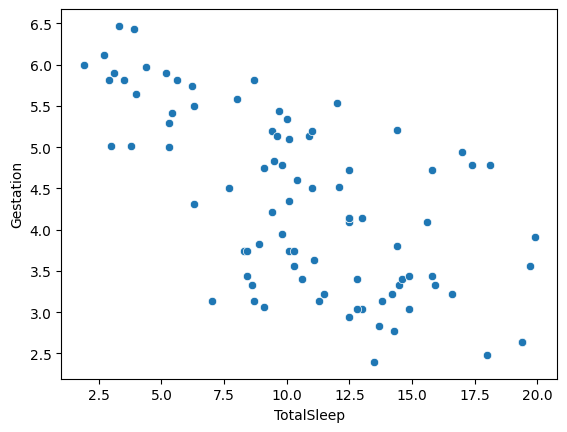

In [23]:
sns.scatterplot(df,x="TotalSleep",y=np.log(df.Gestation))

In [24]:
# Copy the dataset to modify freely
df_processed = df.copy() 

In [25]:
# Using the median to fill the missing values of Predation, Exposure and Danger

# Dictionnary with the values to fill
median_attributes = df[['Vore','Predation','Exposure','Danger']].groupby(['Vore']).median().astype(int).to_dict('split')

# Temporary dataframe with the missing values
temp_df = df.loc[df.Predation.isna()]


i = 0
for vore in median_attributes['index']:
    # Replace the NaN with the values in the dictionnary for each vore
    temp_df.loc[temp_df.Vore == vore,['Predation','Exposure','Danger']] = median_attributes['data'][i]
    i += 1

# Replace the values in the original dataset
df_processed.loc[df_processed.Predation.isna(),['Predation','Exposure','Danger']] = temp_df[['Predation','Exposure','Danger']]

# Verify the result
df_processed.isna().sum()

Species          0
Genus            0
Order            0
Family           0
Vore             0
Conservation     0
BodyWt           0
BrainWt          0
TotalSleep       0
Awake            0
NonDreaming     40
Dreaming        24
LifeSpan         0
Gestation        0
Predation        0
Exposure         0
Danger           0
dtype: int64

In [26]:
# fullday =  df.Awake + df.TotalSleep
# fullday.value_counts()
# 2 strange values

In [27]:
# Possibility to compute the Dreaming missing values ? No
df_processed.loc[df_processed.Dreaming.isna(),["TotalSleep","NonDreaming","Dreaming"]]

,TotalSleep,NonDreaming,Dreaming
0,3.3,NaN,NaN
2,8.7,NaN,NaN
3,12.5,NaN,NaN
4,16.6,NaN,NaN
8,5.2,NaN,NaN
11,12.1,NaN,NaN
14,5.6,NaN,NaN
17,11.5,NaN,NaN
23,15.8,NaN,NaN
33,12.0,NaN,NaN


In [28]:
# Replacing the BrainWt null values
df_BrainWtNonZero = df_processed.loc[df_processed.BrainWt > 0]

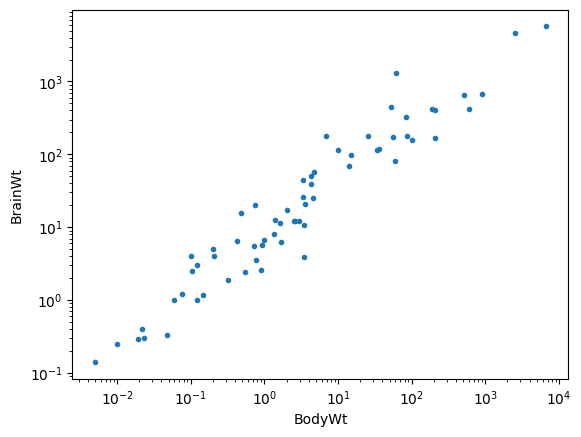

In [29]:
plt.plot(df_BrainWtNonZero.BodyWt,df_BrainWtNonZero.BrainWt,'.')
plt.yscale('log')
plt.ylabel('BrainWt')
plt.xscale('log')
plt.xlabel('BodyWt')
plt.show()

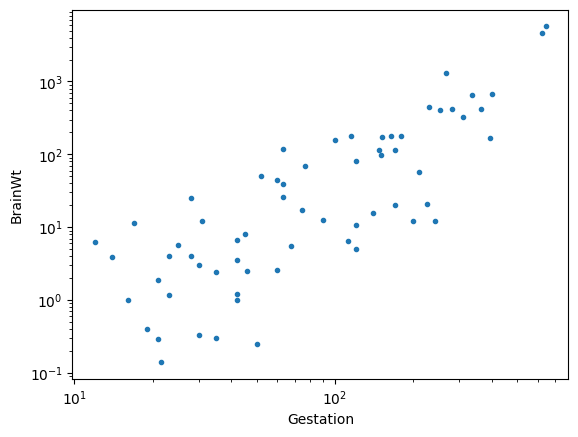

In [30]:
plt.plot(df_BrainWtNonZero.Gestation,df_BrainWtNonZero.BrainWt,'.')
plt.yscale('log')
plt.ylabel('BrainWt')
plt.xscale('log')
plt.xlabel('Gestation')
plt.show()

In [31]:
# Using a regresssion line to fill the missing values
from sklearn.linear_model import LinearRegression

# Data used to draw the regression line
train_data = np.log(df_BrainWtNonZero[['BrainWt','BodyWt','Gestation']])

linreg = LinearRegression()

# Independant variables
train_data_x = train_data[['BodyWt','Gestation']]
# Dependant variable
train_data_y = train_data['BrainWt']

#training the model
linreg.fit(train_data_x,train_data_y)

# Add a column in the dataset with the model computed values
df_processed['BrainWt_computed'] = linreg.predict(np.log(df_processed[['BodyWt','Gestation']]))

In [32]:
# Computing the log for BodyWt in the original dataset
df_processed['BodyWt'] = np.log(df_processed['BodyWt'])

# Computing the log for the non zeros values in BrainWt
df_processed.loc[df_processed.BrainWt!=0,'BrainWt'] = np.log(df_processed.loc[df_processed.BrainWt!=0,'BrainWt'])

# Replace the zeros with the computed values
df_processed.loc[df_processed.BrainWt==0,'BrainWt'] = df_processed.loc[df_processed.BrainWt == 0,'BrainWt_computed']

# Delete the column of the computed BrainWt
df_processed.drop(columns= 'BrainWt_computed' ,inplace = True)

In [33]:
# function to classify the conservation statuses in 3 categories (high risk, low risk and domesticated)
def conservation_classifier (status):
    if (status in ['en','vu','cd','cr']):
        return "high risk"
    elif (status in ['nt','lc']):
        return "low risk"

In [34]:
# Classification of the Conservation column
for status in ['en','vu','cd','cr','nt','lc']:
    df_processed.loc[df_processed.Conservation == status,'Conservation'] = conservation_classifier(status)

df_processed.Conservation.value_counts()

Conservation
low risk        57
high risk       20
domesticated    10
Name: count, dtype: int64

In [35]:
# get dummies to transform the categorical conservation in numerical
df_processed[['high risk','low risk']] = pd.get_dummies(df_processed.Conservation, drop_first=True, dtype=np.uint8)
df_processed[['herbi','insecti','omni']] = pd.get_dummies(df_processed.Vore, drop_first=True, dtype=np.uint8)


# Delete the Conservation and Vore column
df_processed.drop(columns=['Conservation','Vore'],inplace=True)

In [36]:
# Delete all the other unusable columns
df_processed.drop(columns=['Species','Genus','Family','Order','Awake','NonDreaming'],inplace=True)

In [37]:
df_processed.isna().sum()

BodyWt         0
BrainWt        0
TotalSleep     0
Dreaming      24
LifeSpan       0
Gestation      0
Predation      0
Exposure       0
Danger         0
high risk      0
low risk       0
herbi          0
insecti        0
omni           0
dtype: int64

In [38]:
# df_mod["SleepComputed"] = df_mod.NonDreaming + df_mod.Dreaming
# df_mod.loc[df_mod.NonDreaming > 0,["TotalSleep","SleepComputed","NonDreaming","Dreaming"]]
# Discrepancy in the data TotalSleep <> Dreaming + NonDreaming (SleepComputed)

In [39]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_processed,test_size = 0.25)

In [40]:
# TotalSleep regression model

linreg = LinearRegression()

# train data 
X_train = df_train[['BodyWt', 'BrainWt', 'LifeSpan', 'Gestation',
       'Predation', 'Exposure', 'Danger', 'high risk', 'low risk', 'herbi',
       'insecti', 'omni']].values
y_train = df_train['TotalSleep'].values

# test data 
X_test = df_test[['BodyWt', 'BrainWt', 'LifeSpan', 'Gestation',
       'Predation', 'Exposure', 'Danger', 'high risk', 'low risk', 'herbi',
       'insecti', 'omni']].values
# Dependant variable
y_test = df_test['TotalSleep'].values

#training the model
linreg.fit(X_train,y_train)

# Predicting Totalsleep with the model
y_test_predicted = linreg.predict(X_test)


In [41]:

# Results of the regression
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import root_mean_squared_error


MAPE = mean_absolute_percentage_error(y_test,y_test_predicted)
RMSE = root_mean_squared_error(y_test,y_test_predicted)

In [42]:
print('MAPE:',MAPE,'  RMSE',RMSE)

MAPE: 0.38816014858338943   RMSE 3.8263158306788205
